# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [81]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import statsmodels.stats.api as sms
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [25]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Justin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


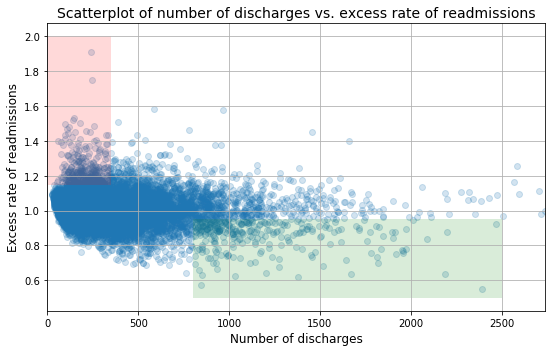

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
df = clean_hospital_read_df
df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


# Do you agree with the above analysis and recommendations? Why or why not?

- In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1
- In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1
<br>
Just by looking at the plot and observing the statistics between the excess readmission rates of hospitals, I believe that it cannot yet be determined if these statistics are significant enough to enfore the changes. That is, I do not agree with the initial analysis and recommendations. Rather, I think it would be prudent to run additional statistics tests to see whether or not the number of discharges can be correlated to excess readmissions rate. <br>
Before instituting official initiatives and directives (especially punitive ones against smaller hospitals) it would be in the policy makers', hospital staff's, and the patients' best interest to see if the correlations between number of discharges and excess readmissions rate is statstistically significant ($\alpha = 0.01$)

In [64]:
# split data
small  = df[(df['Number of Discharges'] < 100) & (df['Number of Discharges'] > 0)]
large = df[(df['Number of Discharges'] > 1000)]

In [65]:
small['Excess Readmission Ratio'].mean()

1.0226183501683506

In [66]:
large['Excess Readmission Ratio'].mean()

0.9783354211663071

# 1. Setup an appropriate hypothesis test.


Since we have two sample means, we want to run a two tail t-test. <br>
We want to see if lower number of discharges mean higher rate of excess readmission ratio. <br>
The hypothesis would be as follows: <br>
- **$H_{0}$** : small_ERR - large_ERR = 0
- **$H_{\alpha}$** : small_ERR - large_ERR > 0

# 2. Compute and report the observed significance value (or p-value).

In [67]:
two_samp_ttest = stats.ttest_ind(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])
print('t-statistic: %.3f | p-value: %.5f.' % two_samp_ttest)

t-statistic: -10.061 | p-value: 0.00000.


Following the results from the two sample t-test, we see that that p-value is 0. It is less than the threshold of $\alpha = 0.01$ and we would reject the null hypothesis. That is, there is a difference between excess readmission ratio between smaller and larger hospitals, categorized by the number of discharges.

# 3. Report statistical significance for $\alpha$ = .01. 


In [71]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(large['Excess Readmission Ratio']), sms.DescrStatsW(small['Excess Readmission Ratio']))
print(cm.tconfint_diff(alpha= 0.01, usevar='unequal'))

(-0.05934050164579684, -0.029225356358290495)


# 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

By constructing a confidence interval with $\alpha = 0.01$ we can see that the larger hospitals with more than 1000 discharges tend to have lower excess readmission ratio by -0.059 to -0.029. The confidence interval tells us that these larger hospitals excess readmission ratio is only lower by around 2 to 5 percent when compared to the smaller hospitals. <br>
When considering the monetary requirements of potential hospital protocol changes, it seems rather rash to be basing it on a 2 percent reduction in excess readmissions rate. Furthermore, by looking at the scatter plot from the initial assessment, it is clear that there is less data on smaller hospitals, and they also suffer from higher outliers. <br>
Perhaps there are other variables that are more heavily influencing the excess readmissions rate. Before committing these policy changes, I would recommend my client to investigate other sources as well.

# 5. Look at the scatterplot above. 
- What are the advantages and disadvantages of using this plot to convey information?
- Construct another plot that conveys the same information in a more direct manner.

The advantage is that we can see all of the datapoints as it correponds between number of discharges and excess readmission ratio as it applies to each hospital. The disadvantage is that it is clustered, and too large/generalized to deduce a clear conclusion. It also contains datapoints from the medium range hospitals with discharges ranging between 100 and 1000, which is not our concern right now. <br>
One clear distinction we can make immediately is removing these middle group datapoints, such that the scatterplot may better show the relationship between number of discharges and the excess readmission ratio.

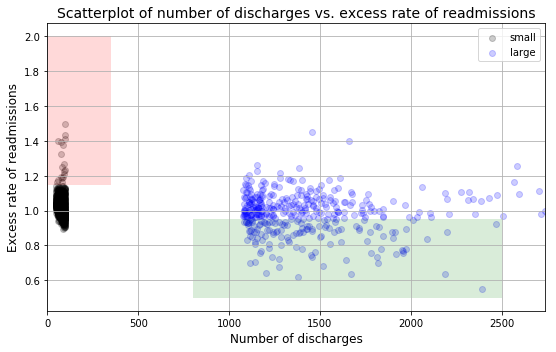

In [80]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x_1 = [a for a in small['Number of Discharges'][81:-3]]
y_1 = list(small['Excess Readmission Ratio'][81:-3])

x_2 = [a for a in large['Number of Discharges'][81:-3]]
y_2 = list(large['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x_1, y_1,alpha=0.2, color = 'black', label = 'small')
ax.scatter(x_2, y_2,alpha=0.2, color = 'blue', label = 'large')

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.legend(loc='upper right')

ax.grid(True)
fig.tight_layout()

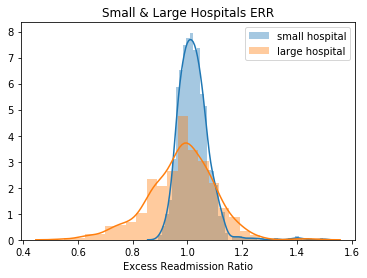

In [102]:
sns.distplot(small['Excess Readmission Ratio'], label = 'small hospital').set_title('Small & Large Hospitals ERR')
sns.distplot(large['Excess Readmission Ratio'], label = 'large hospital')
plt.legend(loc= 'upper right')